# 3주차 (11/14)
## 사용할 모델 선택, 기초 모델(기계 학습) 또는 초기 네트워크 설계(딥러닝)

### 데이터셋 로드

In [47]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터셋 로드
file_path = '../Data/train.csv'
loan_data = pd.read_csv(file_path)

### 범주형 변수 처리 (One-Hot Encoding)

In [28]:
loan_data_encoded = pd.get_dummies(
    loan_data,
    # 주택명의, 대출목적, 대출등급, 신용 기록상의 연채 기록 여부
    columns=['person_home_ownership', 'loan_intent', 'loan_grade', 'cb_person_default_on_file'],
    drop_first=True
)

In [29]:
loan_data_encoded

,id,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_status,person_home_ownership_OTHER,...,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,loan_grade_B,loan_grade_C,loan_grade_D,loan_grade_E,loan_grade_F,loan_grade_G,cb_person_default_on_file_Y
0,0,37,35000,0.0,6000,11.49,0.17,14,0,False,...,False,False,False,True,False,False,False,False,False,False
1,1,22,56000,6.0,4000,13.35,0.07,2,0,False,...,True,False,False,False,True,False,False,False,False,False
2,2,29,28800,8.0,6000,8.90,0.21,10,0,False,...,False,True,False,False,False,False,False,False,False,False
3,3,30,70000,14.0,12000,11.11,0.17,5,0,False,...,False,False,True,True,False,False,False,False,False,False
4,4,22,60000,2.0,6000,6.92,0.10,3,0,False,...,True,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58640,58640,34,120000,5.0,25000,15.95,0.21,10,0,False,...,False,False,False,False,False,True,False,False,False,True
58641,58641,28,28800,0.0,10000,12.73,0.35,8,1,False,...,True,False,False,False,True,False,False,False,False,False
58642,58642,23,44000,7.0,6800,16.00,0.15,2,1,False,...,False,False,False,False,False,True,False,False,False,False
58643,58643,22,30000,2.0,5000,8.90,0.17,3,0,False,...,False,False,False,False,False,False,False,False,False,False


### 예측 변수와 타겟 변수 분리

In [30]:
X = loan_data_encoded.drop(['loan_status', 'id'], axis=1)
y = loan_data_encoded['loan_status']

### 데이터 분리

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 초기 모델 학습

In [32]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### 평가

In [33]:
y_pred = rf_model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:", classification_report(y_test, y_pred))

Accuracy: 0.9517435416489044
Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.92      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.86      0.89     11729
weighted avg       0.95      0.95      0.95     11729



# 4주차 (11/21)
## 특성 엔지니어링 또는 전처리 기법 적용, 모델 튜닝 및 다양한 알고리즘 테스트


### 클래스 가중치 부여

In [34]:
rf_model_balanced = RandomForestClassifier(class_weight='balanced', random_state=42)
rf_model_balanced.fit(X_train, y_train)

RandomForestClassifier(class_weight='balanced', random_state=42)

### 예측 및 평가

In [35]:
y_pred_balanced = rf_model_balanced.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred_balanced))
print("Classification Report:", classification_report(y_test, y_pred_balanced))

Accuracy: 0.9512319890868787
Classification Report:               precision    recall  f1-score   support

           0       0.95      0.99      0.97     10087
           1       0.92      0.71      0.80      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



### 모델 초기화

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000, random_state=42),
    "Support Vector Machine (SVM)": SVC(probability=True, random_state=42),
    "Random Forest": RandomForestClassifier(class_weight='balanced', random_state=42),
}

### 결과 저장

In [37]:
results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    results[name] = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Classification Report": classification_report(y_test, y_pred, output_dict=True)
    }

/Users/mungyeongho/anaconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mungyeongho/anaconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mungyeongho/anaconda3/envs/AI_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

### 결과 정리

In [38]:
results_summary = pd.DataFrame({
    name: {
        "Accuracy": result["Accuracy"],
        "F1-Score (Class 1)": result["Classification Report"]["1"]["f1-score"]
    }
    for name, result in results.items()
}).T

print(results_summary)

                              Accuracy  F1-Score (Class 1)
Logistic Regression           0.883195            0.439902
Support Vector Machine (SVM)  0.860005            0.000000
Random Forest                 0.951232            0.803571


# 5주차 (11/28)
## 최종 튜닝(하이퍼파라미터 튜닝, 교차 검증 등) 수행, 최적 모델 결정

### 하이퍼파라미터 그리드 설정

In [39]:
from sklearn.model_selection import GridSearchCV

param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

grid_search_rf = GridSearchCV(
    estimator=RandomForestClassifier(class_weight='balanced', random_state=42),
    param_grid=param_grid_rf,
    scoring='accuracy',
    cv=3
)

### 튜닝 수행

In [40]:
grid_search_rf.fit(X_train, y_train)
best_rf_model = grid_search_rf.best_estimator_


### 최종 모델 평가

In [41]:
y_pred_best = best_rf_model.predict(X_test)
print("Best Model Accuracy:", accuracy_score(y_test, y_pred_best))
print("Best Model Classification Report:", classification_report(y_test, y_pred_best))

Best Model Accuracy: 0.9516582828885668
Best Model Classification Report:               precision    recall  f1-score   support

           0       0.96      0.99      0.97     10087
           1       0.92      0.72      0.81      1642

    accuracy                           0.95     11729
   macro avg       0.94      0.85      0.89     11729
weighted avg       0.95      0.95      0.95     11729



# 6주차 (12/5)
## 프로젝트 보고서 준비 및 발표 자료 제작, 성능 지표, 시각화 및 통찰 추가


### 혼동 행렬 시각화

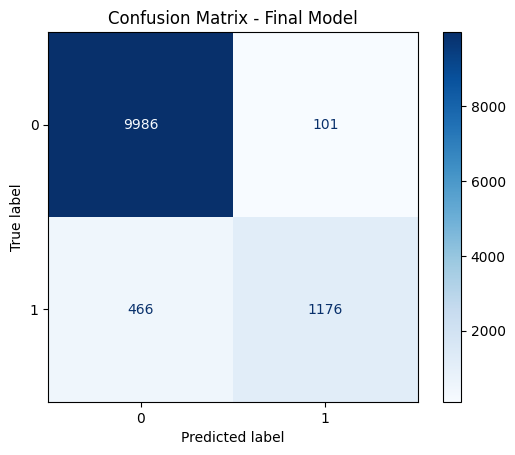

In [48]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_best)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_rf_model.classes_)
disp.plot(cmap="Blues")
plt.title("Confusion Matrix - Final Model")
plt.show()

#### 정확도
$\frac{(TP+TN)}{(TP+TN+FP+FN)}$
    
$\frac{(9986+1176)}{(9986+101+466+1176)} = 0.95165828$

#### 정밀도
$\frac{(TP)}{(TP+FP)}$

$\frac{(9986)}{(9986+466)}=0.95541523$

#### 민감도
$\frac{(TP)}{(TP+FN)}$

$\frac{(9986)}{(9986+101)}=0.98998711$

#### 특이도
$\frac{(TN)}{(TN+FP)}$

$\frac{(1176)}{(1176+466)}=0.71619976$

### 특성 중요도

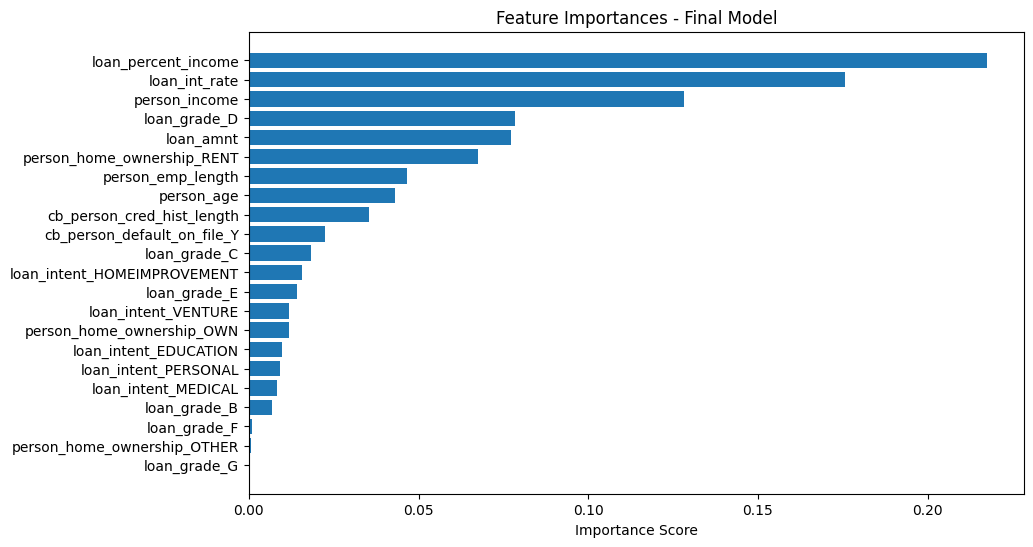

In [49]:
feature_importances = best_rf_model.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
features = X.columns

plt.figure(figsize=(10, 6))
plt.barh(features[sorted_indices], feature_importances[sorted_indices])
plt.title("Feature Importances - Final Model")
plt.xlabel("Importance Score")
plt.gca().invert_yaxis()
plt.show()
